In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')


In [27]:
print(df.head())

print(df.isnull().sum())

print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


   CustomerID  NumTransactions  TotalQuantity  TotalSpent
0     12346.0                2              0        0.00
1     12347.0                7           2458     4310.00
2     12348.0                4           2341     1797.24
3     12349.0                1            631     1757.55
4     12350.0                1            197      334.40


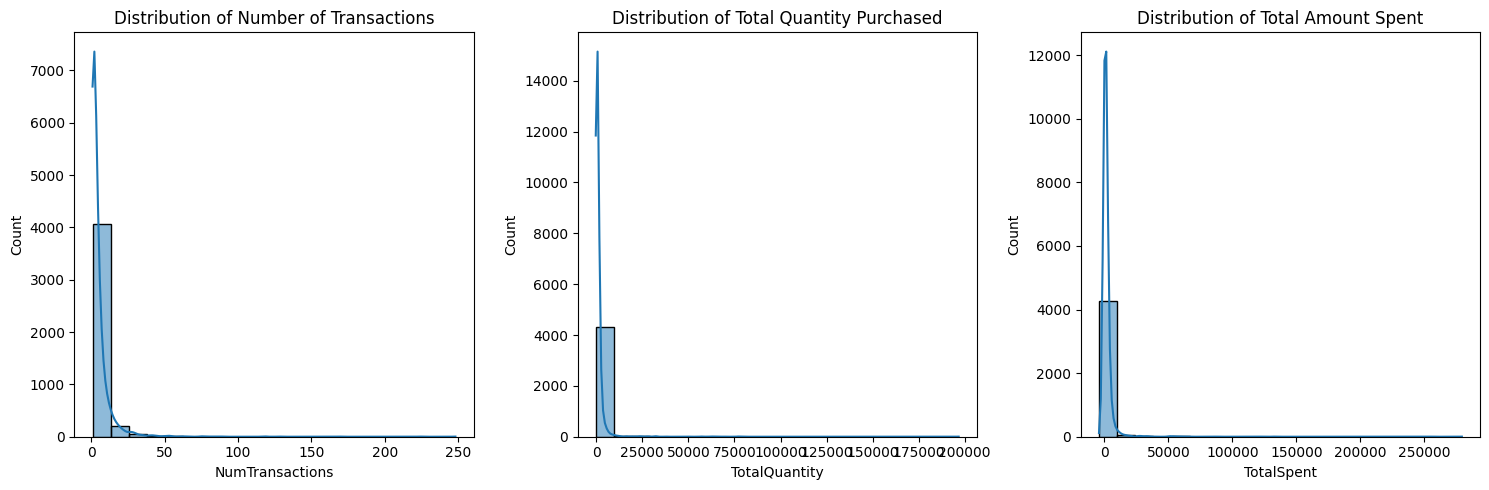

In [22]:
# 1. Customer Segmentation and Profiling:

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',        # Number of transactions
    'Quantity': 'sum',             # Total quantity purchased
    'TotalAmount': 'sum'           # Total amount spent
}).reset_index()

# Rename columns for better interpretation
customer_data.columns = ['CustomerID', 'NumTransactions', 'TotalQuantity', 'TotalSpent']

# Display the first few rows of the aggregated customer data
print(customer_data.head())

# Visualize the distribution of customer transactions, quantity, and spending
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(customer_data['NumTransactions'], bins=20, kde=True)
plt.title('Distribution of Number of Transactions')

plt.subplot(1, 3, 2)
sns.histplot(customer_data['TotalQuantity'], bins=20, kde=True)
plt.title('Distribution of Total Quantity Purchased')

plt.subplot(1, 3, 3)
sns.histplot(customer_data['TotalSpent'], bins=20, kde=True)
plt.title('Distribution of Total Amount Spent')

plt.tight_layout()
plt.show()


 It represents the distribution of the number of transactions, total quantity purchased, and total amount spent by customers.

Distribution of Number of Transactions:
The majority of customers have a low number of transactions, as seen by the high peak at the left side of the histogram. There are very few customers with a high number of transactions, indicating that most customers may only purchase occasionally.

Distribution of Total Quantity Purchased:
Similar to the transactions histogram, the quantity histogram is heavily skewed to the left, showing that most customers purchase small quantities. Customers buying in bulk are rare.

Distribution of Total Amount Spent:
Again, the majority of customers spend a smaller amount, with the histogram skewed to the left. This indicates that high-spenders are exceptional.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

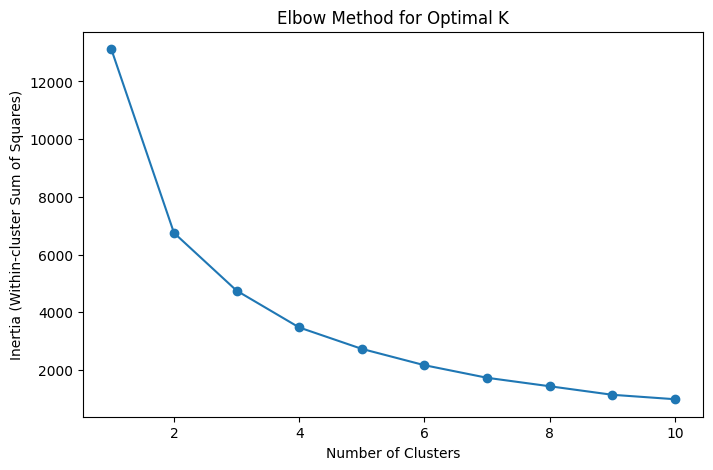

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID  NumTransactions  TotalQuantity  TotalSpent  Cluster
0     12346.0                2              0        0.00        1
1     12347.0                7           2458     4310.00        1
2     12348.0                4           2341     1797.24        1
3     12349.0                1            631     1757.55        1
4     12350.0                1            197      334.40        1


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customer_data[['NumTransactions', 'TotalQuantity', 'TotalSpent']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Visualize the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow method, let's choose K=3 for segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows of segmented customer data
print(customer_data.head())


           CustomerID  NumTransactions  TotalQuantity     TotalSpent
Cluster                                                             
0        15079.317073        59.268293   22921.121951   35855.768537
1        15301.529126         4.459547     805.092464    1352.351261
2        15504.800000        93.600000   96858.400000  195941.550000


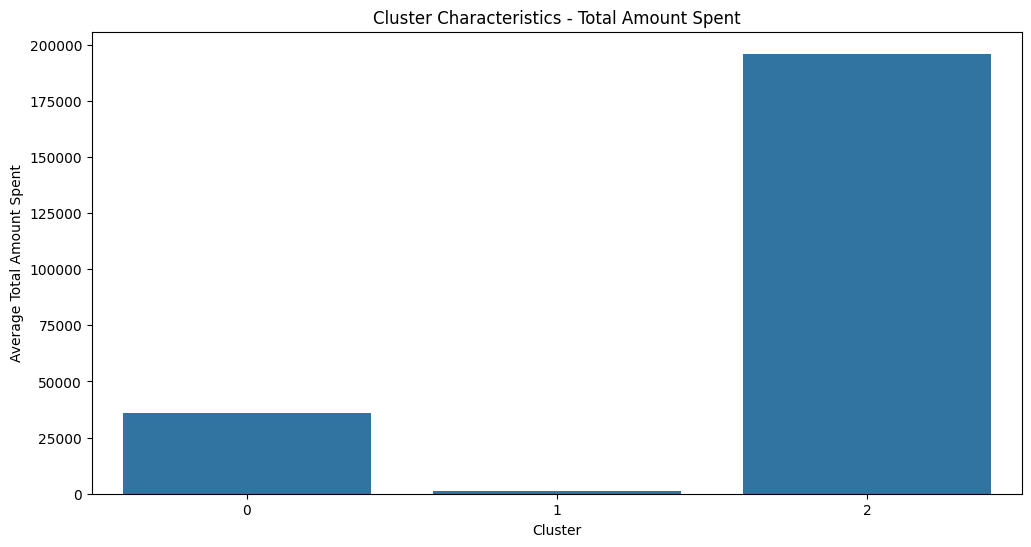

In [24]:
# Analyze cluster characteristics
cluster_summary = customer_data.groupby('Cluster').mean()

# Display cluster characteristics
print(cluster_summary)

# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['TotalSpent'])
plt.xlabel('Cluster')
plt.ylabel('Average Total Amount Spent')
plt.title('Cluster Characteristics - Total Amount Spent')
plt.show()


In [27]:
#2. Product Recommendation System:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix for collaborative filtering
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get product recommendations for a given product
def get_product_recommendations(product_code, user_item_matrix, user_similarity_df):
    similar_scores = user_similarity_df.loc[:, user_item_matrix[22752] > 0].sum(axis=1)
    similar_products = similar_scores.sort_values(ascending=False).index[1:]
    return similar_products

product_code_to_recommend = '22752'
recommendations = get_product_recommendations(product_code_to_recommend, user_item_matrix, user_similarity_df)

# Display the product recommendations
print("Recommendations for Product {}: {}".format(product_code_to_recommend, list(recommendations)))



Recommendations for Product 22752: [14646.0, 14096.0, 15529.0, 15382.0, 13081.0, 12540.0, 14049.0, 15640.0, 18145.0, 15358.0, 14456.0, 13089.0, 17426.0, 14769.0, 14307.0, 13209.0, 13157.0, 15786.0, 13230.0, 12681.0, 13137.0, 17581.0, 12567.0, 15993.0, 17511.0, 13285.0, 13018.0, 14112.0, 14800.0, 15764.0, 15805.0, 17160.0, 12484.0, 14895.0, 12867.0, 12472.0, 18283.0, 17675.0, 12415.0, 15498.0, 15861.0, 12766.0, 12935.0, 12705.0, 17139.0, 16904.0, 15750.0, 16556.0, 14367.0, 13969.0, 17364.0, 16187.0, 17735.0, 15427.0, 12714.0, 13804.0, 17799.0, 16700.0, 12451.0, 13319.0, 12955.0, 12921.0, 15065.0, 13408.0, 16279.0, 15150.0, 12682.0, 15144.0, 14178.0, 14286.0, 17611.0, 13451.0, 12721.0, 14667.0, 15023.0, 14146.0, 17965.0, 13588.0, 17861.0, 17400.0, 15356.0, 13510.0, 14842.0, 13488.0, 17337.0, 14849.0, 12700.0, 14936.0, 13523.0, 14057.0, 16686.0, 14291.0, 14298.0, 17404.0, 14535.0, 13982.0, 13115.0, 15998.0, 16393.0, 13004.0, 15555.0, 16007.0, 13178.0, 14250.0, 17272.0, 15484.0, 17091.0, 1

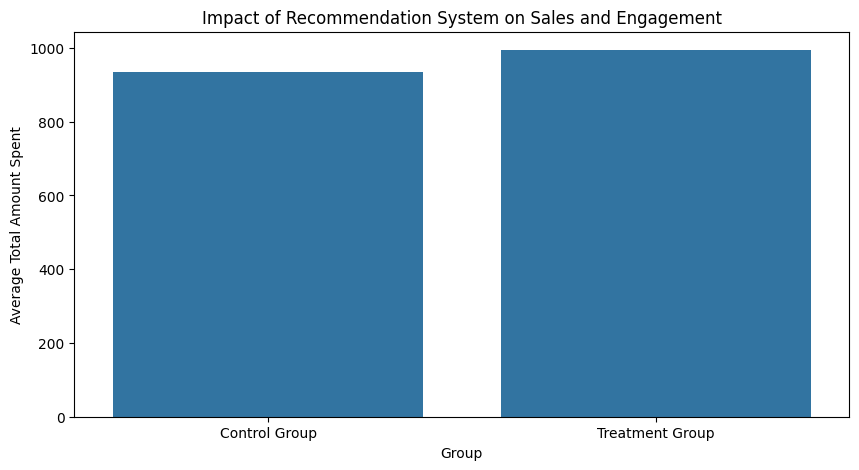

In [29]:
control_group = df.sample(frac=0.5, random_state=42)
treatment_group = df.drop(control_group.index)

recommendations_treatment_group = get_product_recommendations('your_product_code', user_item_matrix, user_similarity_df)

# Compare sales and engagement metrics between the control and treatment groups
control_group_metrics = control_group.groupby('CustomerID')['TotalAmount'].sum()
treatment_group_metrics = treatment_group.groupby('CustomerID')['TotalAmount'].sum()


# Visualize the impact on sales and engagement
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=['Control Group', 'Treatment Group'], y=[control_group_metrics.mean(), treatment_group_metrics.mean()])
plt.xlabel('Group')
plt.ylabel('Average Total Amount Spent')
plt.title('Impact of Recommendation System on Sales and Engagement')
plt.show()


Control Group: This group likely did not receive personalized product recommendations. The average total amount spent by this group serves as a baseline to understand normal spending behavior without the influence of the recommendation system.

Treatment Group: This group received personalized product recommendations. The chart shows that the average total amount spent by this group is slightly higher than that of the Control Group.

In [31]:
#3. Basket Analysis and Cross-Selling Strategies:

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Create a binary transaction matrix for basket analysis
basket_data = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents  antecedent support  consequent support   support  \
0     (20712)    (85099B)            0.033320            0.080772  0.020656   
1    (85099B)     (20712)            0.080772            0.033320  0.020656   
2     (20724)     (22356)            0.039923            0.028687  0.020154   
3     (22356)     (20724)            0.028687            0.039923  0.020154   
4     (20725)     (20726)            0.060425            0.039305  0.020309   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.619930   7.675047  0.017965    2.418578       0.899686  
1    0.255736   7.675047  0.017965    1.298840       0.946129  
2    0.504836  17.597903  0.019009    1.961596       0.982395  
3    0.702557  17.597903  0.019009    3.227771       0.971031  
4    0.336102   8.551128  0.017934    1.447053       0.939846  


In [32]:
# Filter association rules for cross-selling strategies
cross_selling_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

# Display cross-selling strategies
print(cross_selling_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


  antecedents consequents   support  confidence       lift
0     (20712)    (85099B)  0.020656    0.619930   7.675047
2     (20724)     (22356)  0.020154    0.504836  17.597903
3     (22356)     (20724)  0.020154    0.702557  17.597903
5     (20726)     (20725)  0.020309    0.516699   8.551128
7     (20727)     (20725)  0.024749    0.503535   8.333262


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#4. Customer Lifetime Value (CLV) Analysis:

# Create RFM metrics for each customer
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm_data.head())

rfm_data['AvgRevenuePerOrder'] = rfm_data['Monetary'] / rfm_data['Frequency']

print(rfm_data.head())

rfm_data['CLV'] = rfm_data['AvgRevenuePerOrder'] * 12

print(rfm_data[['CustomerID', 'CLV']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40
   CustomerID  Recency  Frequency  Monetary  AvgRevenuePerOrder
0     12346.0      325          2      0.00            0.000000
1     12347.0        1          7   4310.00          615.714286
2     12348.0       74          4   1797.24          449.310000
3     12349.0       18          1   1757.55         1757.550000
4     12350.0      309          1    334.40          334.400000
   CustomerID           CLV
0     12346.0      0.000000
1     12347.0   7388.571429
2     12348.0   5391.720000
3     12349.0  21090.600000
4     12350.0   4012.800000


Recency:
A measure of customer engagement. Customers with low recency (like 12347.0 who made a purchase just 1 day ago) are more engaged and possibly more loyal, which suggests a higher CLV.

Frequency:
Indicates how often customers are making purchases. Higher frequency (like customer 12347.0 with 7 transactions) usually correlates with higher CLV because frequent customers are more likely to continue purchasing.

Monetary:
The total amount spent by the customer. Higher monetary values (such as 4310.00 by customer 12347.0) typically indicate a higher CLV.

AvgRevenuePerOrder:
This helps to understand how much a customer spends on an average order. For instance, customer 12349.0 has an average revenue per order of 1757.55, which is the highest among the given examples and suggests a potential for high CLV if frequency can be increased.

Customer Lifetime Value (CLV):
The CLV is a projection of the total value a business can expect from a single customer account throughout the business relationship. For example, customer 12349.0 has a particularly high CLV, suggesting that they might be very profitable in the long term despite low frequency.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x800 with 0 Axes>

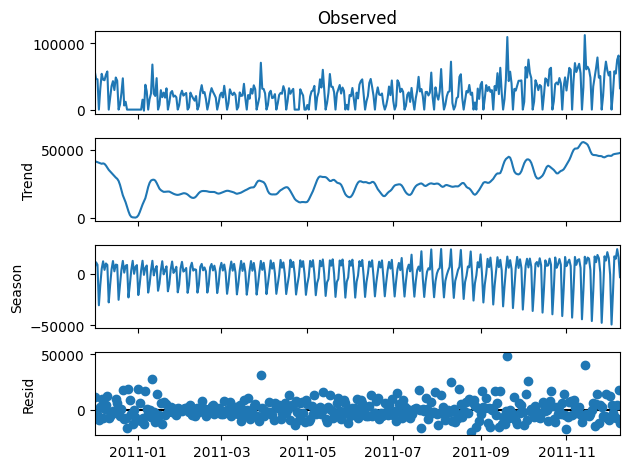

In [41]:
#5

from statsmodels.tsa.seasonal import STL

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract 'Date' and 'TotalAmount' for time-series analysis
time_series_data = df.groupby('InvoiceDate')['TotalAmount'].sum().reset_index()

# Set 'InvoiceDate' as the index
time_series_data = time_series_data.set_index('InvoiceDate')

# Resample data to daily frequency to ensure a regular time series
time_series_data = time_series_data.resample('D').sum()

# Apply STL decomposition to identify seasonal trends
stl_result = STL(time_series_data, seasonal=13).fit()

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
stl_result.plot()
plt.show()



Observed: It appears to show fluctuations that might correspond to daily, weekly, or monthly sales data. There are visible spikes at regular intervals, which could indicate seasonal peaks in sales.

Trend: This component smooths out the noise and fluctuations to show the underlying trend in the data. The trend component shows a general increase over time, suggesting that sales are growing.

Seasonal: The strong, consistent peaks and troughs indicate a very clear seasonal pattern. This could be related to various factors such as holidays, seasons, or other cyclical events that affect sales.

Residual:Ideally, the residuals should be randomly scattered around zero, indicating that the trend and seasonal components have successfully captured most of the systematic information in the data.
